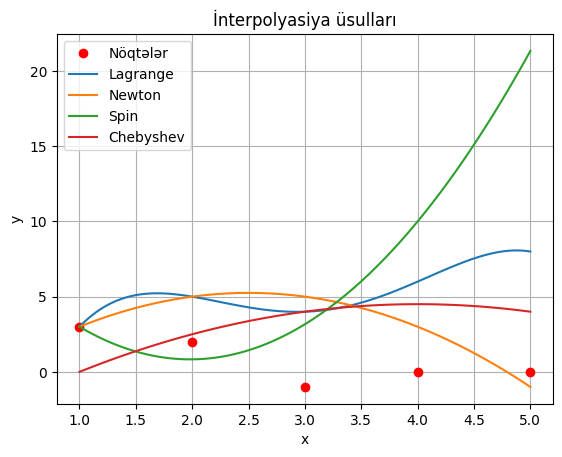

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# data set
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([3, 5, 4, 6, 8])

# Lagrange İnterpolyasiyası
def lagrange_interpolation(x, y, x_interp):
    n = len(x)
    result = 0.0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if j != i:
                term *= (x_interp - x[j]) / (x[i] - x[j])
        result += term
    return result

# Newton İnterpolyasiyası
def newton_interpolation(x, y, x_interp):
    n = len(x)
    coef = np.zeros(n)
    coef[0] = y[0]
    for i in range(1, n):
        for j in range(n - 1, i - 1, -1):
            y[j] = (y[j] - y[j - 1]) / (x[j] - x[j - i])
        coef[i] = y[i]
    result = 0.0
    for i in range(n):
        term = coef[i]
        for j in range(i):
            term *= (x_interp - x[j])
        result += term
    return result

# Spin İnterpolyasiyası
def spin_interpolation(x, y, x_interp):
    n = len(x)
    c = np.zeros(n)
    d = np.zeros(n)
    c[0] = y[0]
    for i in range(1, n):
        d[i - 1] = y[i] - y[i - 1]
        c[i] = d[i - 1]
        for j in range(i - 1, 0, -1):
            c[j] = (c[j] - c[j - 1]) / (x[i] - x[j])
    result = c[n - 1]
    for i in range(n - 2, -1, -1):
        result = c[i] + (x_interp - x[i]) * result
    return result

# Chebyshev İnterpolyasiyası
def chebyshev_interpolation(x, y, x_interp):
    n = len(x)
    def chebyshev_poly(k, x):
        if k == 0:
            return 1
        elif k == 1:
            return x
        else:
            return 2 * x * chebyshev_poly(k - 1, x) - chebyshev_poly(k - 2, x)

    result = 0.0
    for i in range(n):
        term = y[i] * chebyshev_poly(i, (2 * x_interp - x[0] - x[-1]) / (x[-1] - x[0]))
        result += term
    return result

# x interpolyasiya intervalı
x_interp = np.linspace(1, 5, 100)

# x interpolyasiya dəyərlərinin hesablanması
y_lagrange = lagrange_interpolation(x_data, y_data, x_interp)
y_newton = newton_interpolation(x_data, y_data, x_interp)
y_spin = spin_interpolation(x_data, y_data, x_interp)
y_chebyshev = chebyshev_interpolation(x_data, y_data, x_interp)

# Matplotlib ilə vizuallaşdırma
plt.plot(x_data, y_data, 'ro', label='Nöqtələr')
plt.plot(x_interp, y_lagrange, label='Lagrange')
plt.plot(x_interp, y_newton, label='Newton')
plt.plot(x_interp, y_spin, label='Spin')
plt.plot(x_interp, y_chebyshev, label='Chebyshev')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('İnterpolyasiya üsulları')
plt.grid(True)
plt.show()